In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13
### <u>IMPORTANT NOTE:</u> All students must complete HW5 - this homework grade cannot be dropped as part of the lowest homework grade drop policy.

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
# base libraries
########################################
import matplotlib.pyplot as plt # for graphs
import numpy as np 
import pandas as pd

plt.rcParams["font.size"] = 16

# sklearn libraries
########################################
# split data
################
from sklearn.model_selection import train_test_split

# process data
################
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer

# pipelines
################
from sklearn.pipeline import Pipeline, make_pipeline

# cross validate and hyper-parameter tuning
################
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
)
# Baseline model
################
from sklearn.dummy import DummyClassifier

# models
################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# evaluation 
################
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

According to Business Insider(https://www.businessinsider.com/personal-finance/credit-score/what-is-a-credit-card-default), a "Credit card defaults occur when you don't pay your bill for an extended period, usually 180 days." Banks may want to avoid this since if a user doesn't pay their debts to the bank, the bank is at a loss or may have to take additional action. This is an inconvenience that would rather be avoided, so it makes sense for banks to identify such users before they default on their credit cards. This is going to be a classification problem, classifying each user into "will default" or "won't default". The features of the dataset include, for 5 consecutive months, repayment status, amount due, and amount paid, along with other features like sex and education. I think features to do with how the user previously paid their bills might be useful in predicting if a user might default, so I'll be investigating this.

In [3]:
cc_df = pd.read_csv("data/UCI_Credit_Card.csv")
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


To better understand the dataset, take a look at the description

In [4]:
print(cc_df.shape)
cc_df.info()
cc_df.describe()

(30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2          

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Key things to note at this stage is that there doesn't seem to be any non-null data for any features, since # of non-nulls = total number of examples. There won't be a need to impute the data. Another key thing to note is that the mean for default.payment.next.month is 0.221 which implies that there are more "won't default"(given value 0) than there are "will default"(given value 1). This suggests a class imbalance that we may have to deal with later.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

Before progressing in anyway, I like to split the data into training and test sets so it is easier to prevent the test set from influencing the training set in anyway. I think a 70%-30% split would be good, giving us 20,000 examples to train on and 10,000 to test on.

In [5]:
train_df, test_df = train_test_split(cc_df, test_size=0.3, random_state=123)
train_df.shape

(21000, 25)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

I think it is valuable to look at features like gender, marriage, and education and see if there might be any correlation between that and the likelihood of of defaulting a credit card. However, I think the features that might affect results more would be the status, bill and pay amounts. This will be the focus of my investigation.

First, I want to further visualize the class imbalance detected earlier:

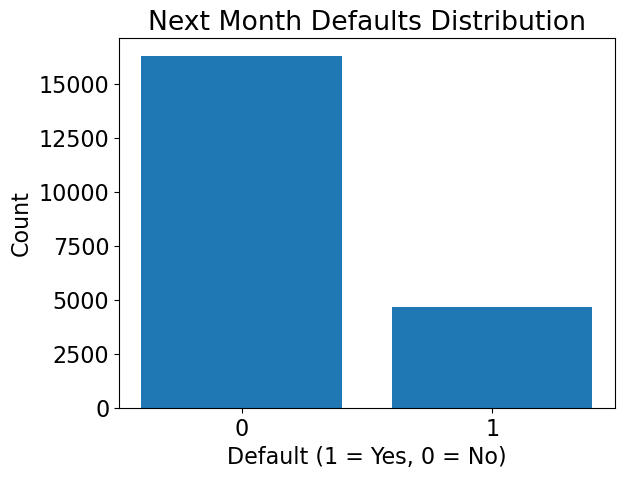

In [6]:
target_counts = train_df['default.payment.next.month'].value_counts()
plt.bar(target_counts.index, target_counts.values)
plt.title('Next Month Defaults Distribution')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

The plot above shows that there is a clear class disparity. Might address this with oversampling or undersampling when creating the final model.
The proportions are shown below

In [7]:
print("Proportion:\n", target_counts / target_counts.sum())

Proportion:
 default.payment.next.month
0    0.776762
1    0.223238
Name: count, dtype: float64


Next, We want to perform univariate analysis to better understand the distribution and spread of our data.

In [8]:
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
 # only going to plot the first 3 to get a general idea for bill amount and pay amount
numerical_cols = ['LIMIT_BAL', 'AGE'] + \
                 [f'BILL_AMT{i}' for i in range(1, 4)] + \
                 [f'PAY_AMT{i}' for i in range(1, 4)]

## Univariate analysis
### Categorical Features

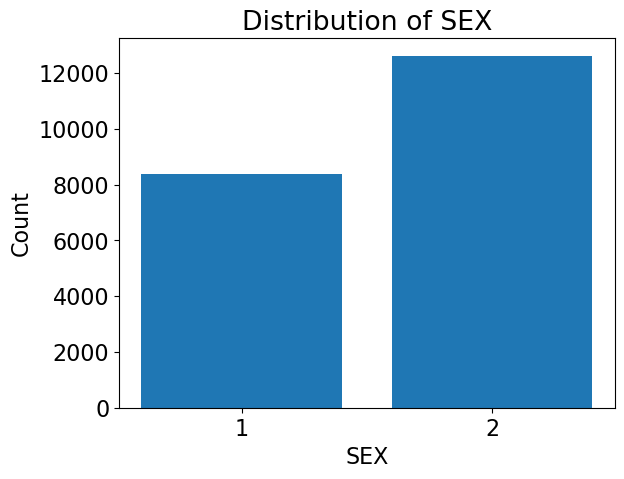

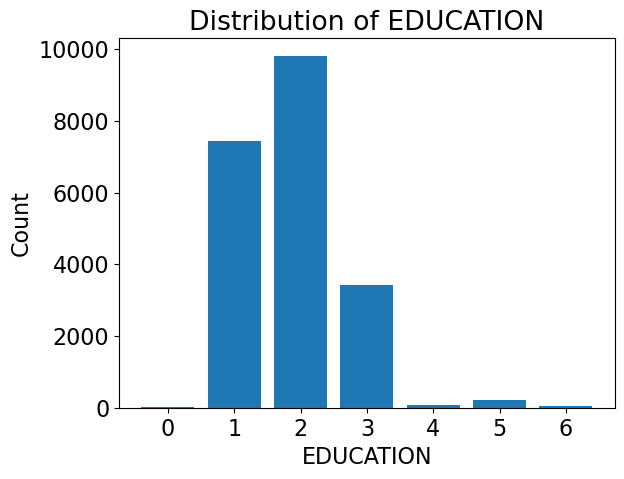

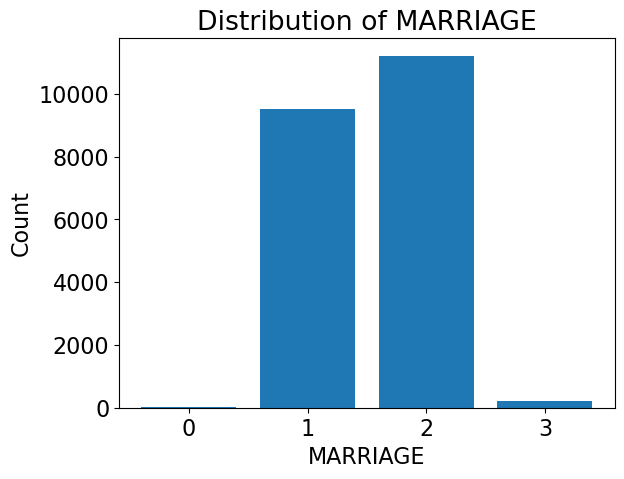

In [9]:
for col in categorical_cols:
    counts = train_df[col].value_counts().sort_index()
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### Numerical Features

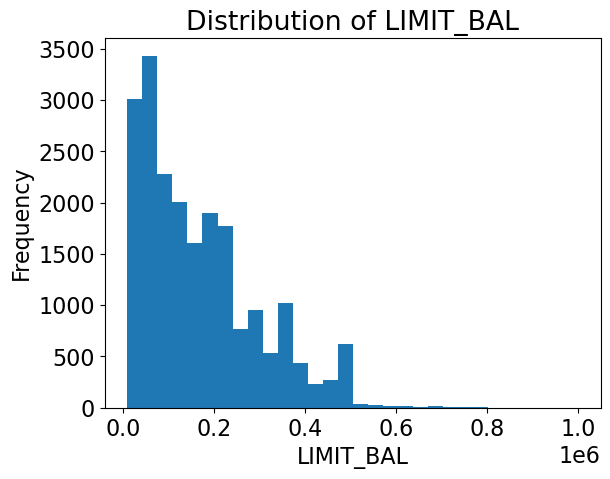

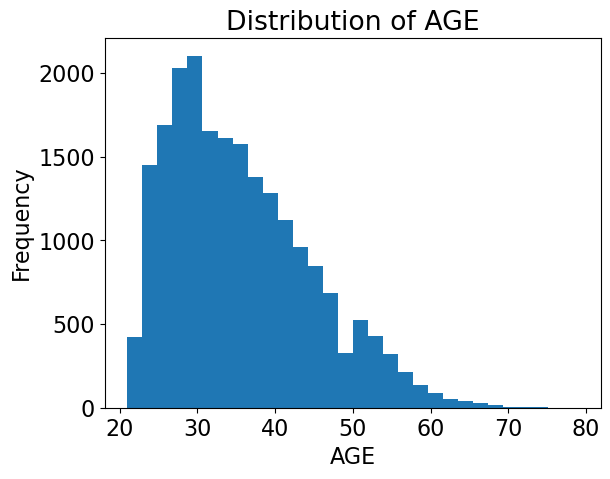

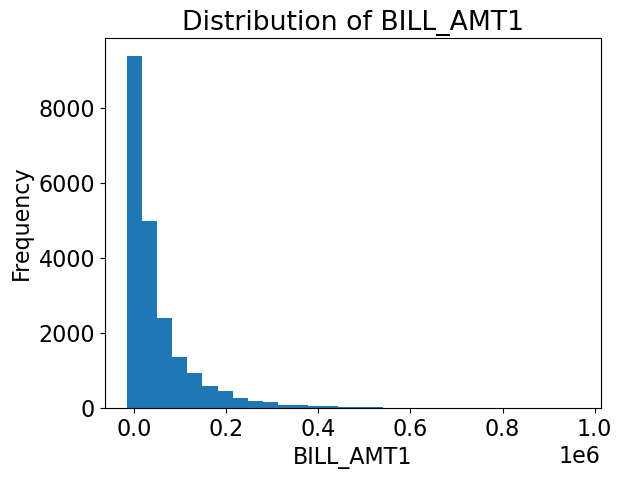

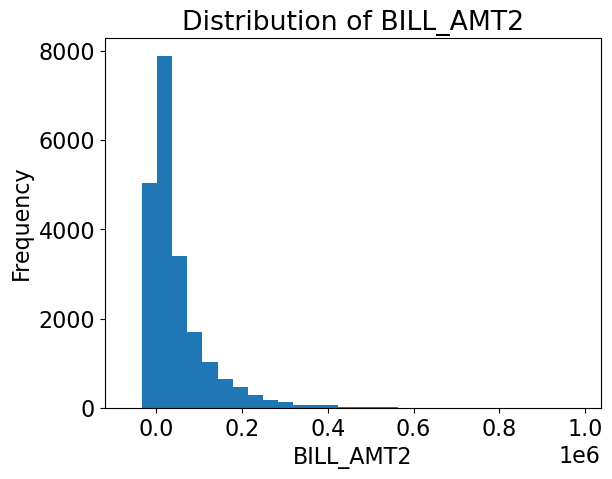

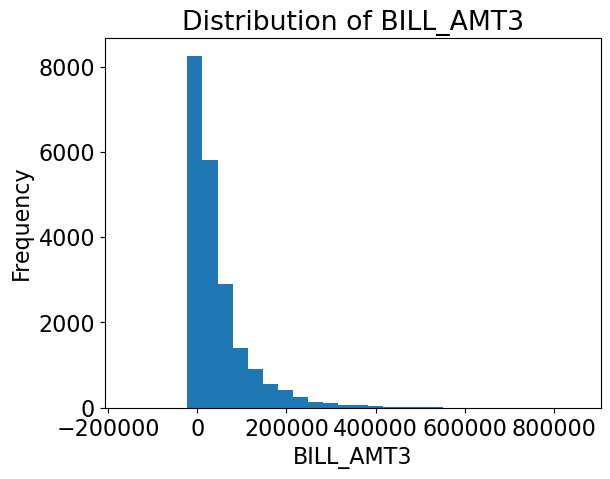

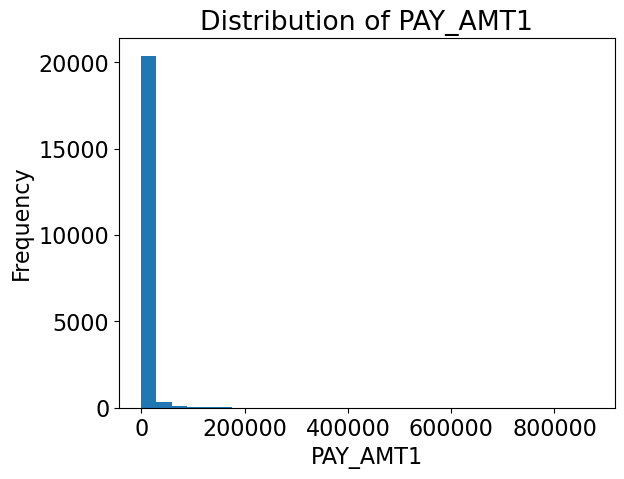

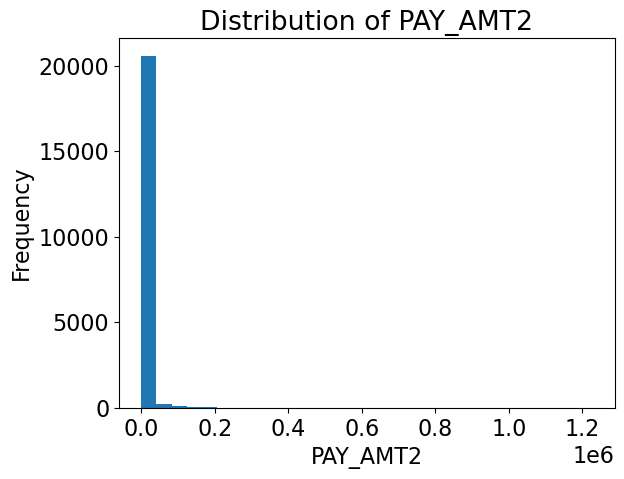

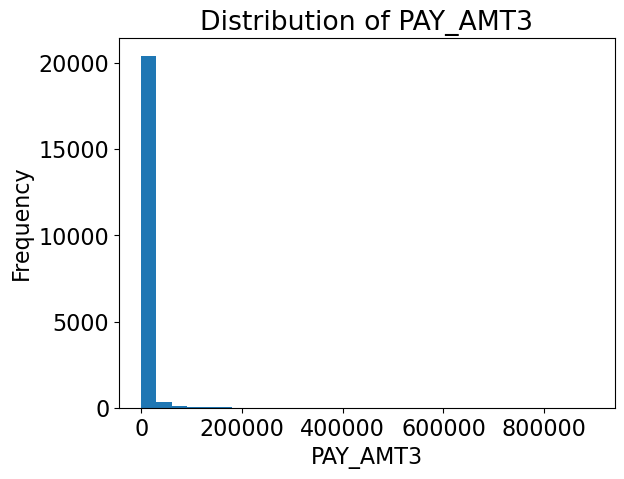

In [10]:
for col in numerical_cols:
    plt.hist(train_df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### discussion
The categorical features look fairly standard. It is interesting, however, to note that the bill amounts and pay amounts are all very right skewed. This makes sense since we wouldn't expect most people to have and pay very high bills. We expect to see similar distributions for the bivariate analysis.

## Bivariate Analysis
### Categorical Features

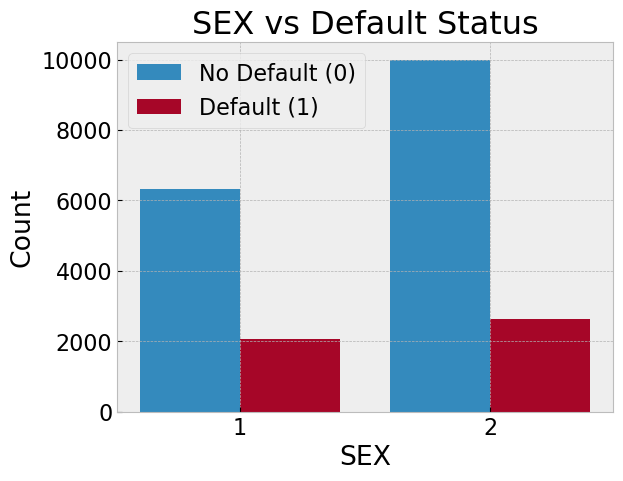

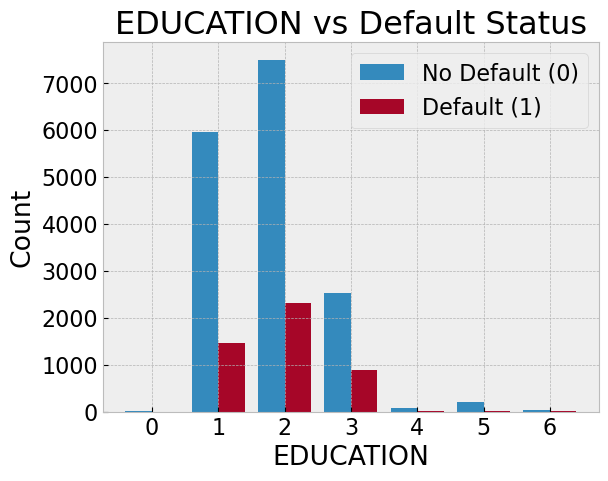

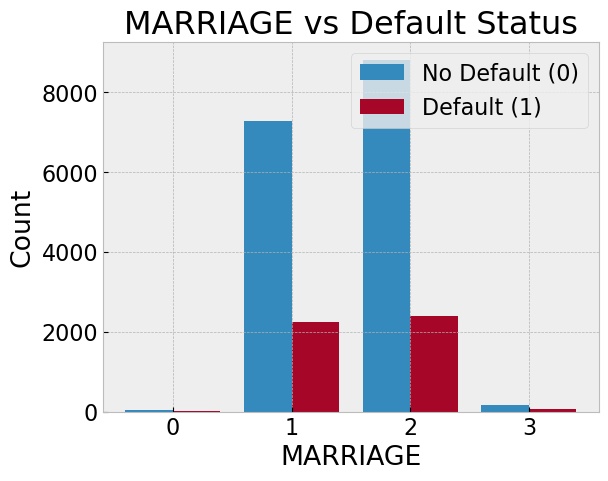

In [11]:
for col in categorical_cols:
    crosstab = pd.crosstab(train_df[col], train_df['default.payment.next.month'])
    crosstab = crosstab.sort_index()
    width = 0.4
    x = np.arange(len(crosstab.index))

    plt.style.use("bmh")
    plt.bar(x - width/2, crosstab[0], width=width, label='No Default (0)')
    plt.bar(x + width/2, crosstab[1], width=width, label='Default (1)')
    plt.title(f'{col} vs Default Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(ticks=x, labels=crosstab.index.astype(str))
    plt.legend()
    plt.show()

### Numerical Features

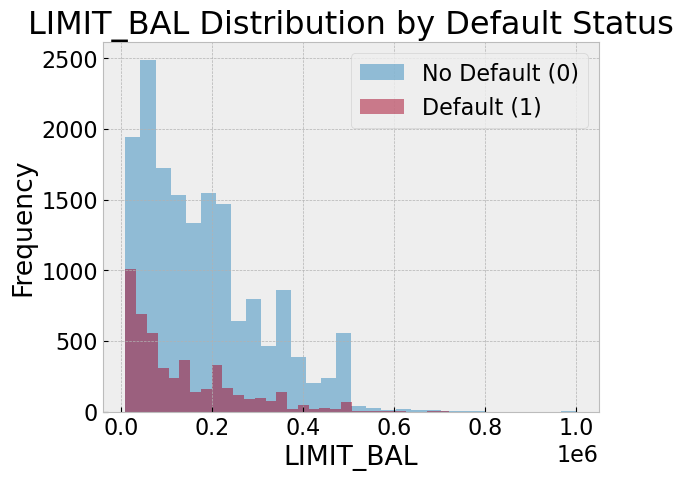

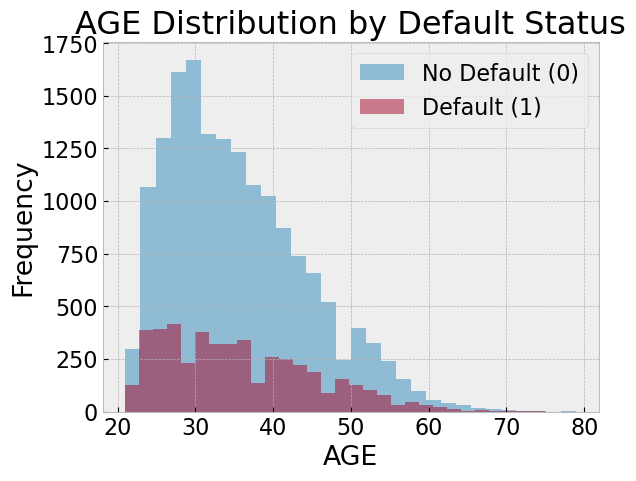

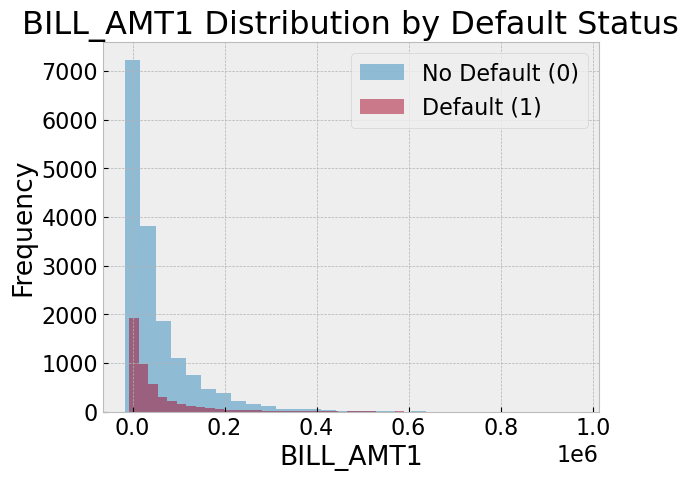

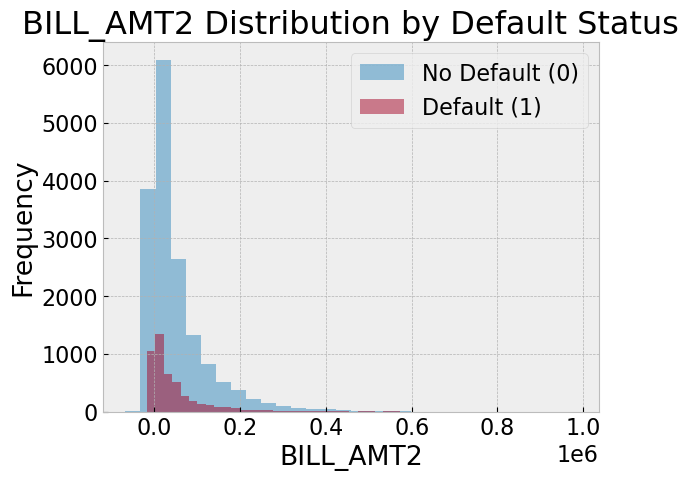

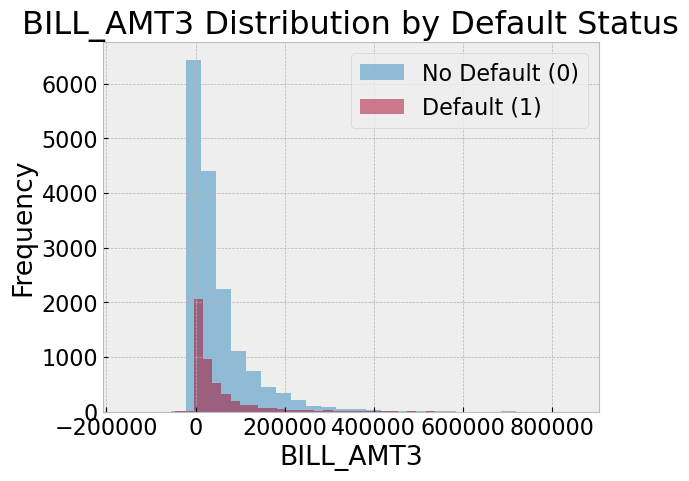

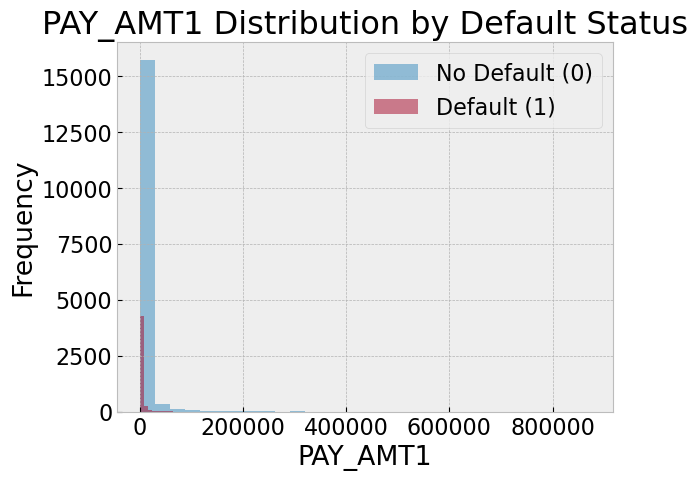

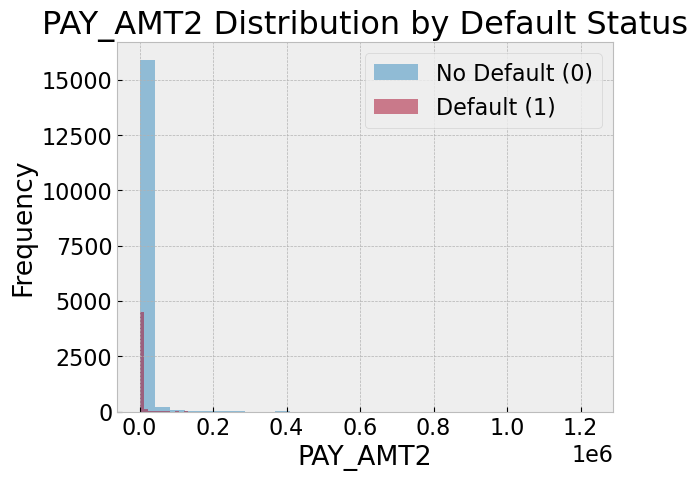

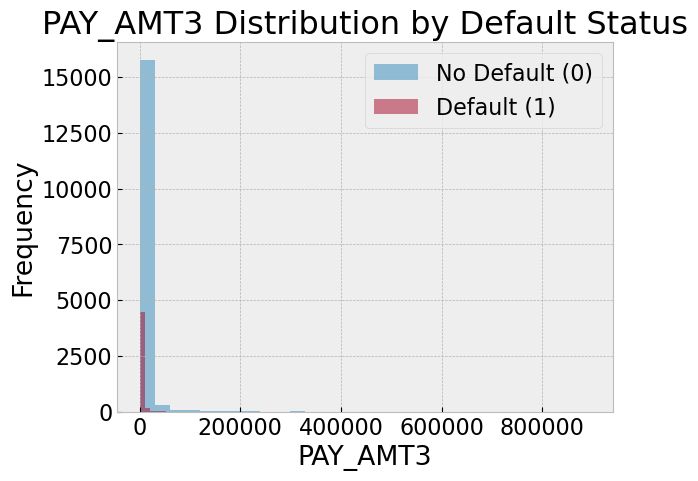

In [12]:
for col in numerical_cols:
    data_0 = train_df[train_df['default.payment.next.month'] != 1][col]
    data_1 = train_df[train_df['default.payment.next.month'] == 1][col]
    plt.style.use("bmh")
    plt.hist(data_0, bins=30, alpha=0.5, label='No Default (0)')
    plt.hist(data_1, bins=30, alpha=0.5, label='Default (1)')
    plt.title(f'{col} Distribution by Default Status')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

#### Discussion
The plots above show the distribution of each feature, split by whether they default next month or not. For a feature that have high correlation, we expect to see bimodal distributions - that is to say that we expect two distinct peaks distinguished by whether the user defaulted or not. Through all the histograms, this is not evident, so there isn't a significant correlation when considering only one variable. This does not mean that the features are useless, as when paired with other features, we may see more correlation.

It was also interesting to note that for each feature, both categorical and numeric, the default value frequency seemed to be an almost consistent proportion of the frequency of non-defaults.

### Pay status analysis
Something I believe might be useful is the  pay status of the users. This gives an indication of how many months late a user is in paying their credit card bills. I expect that if a user is chronically late to paying their fees, they are more likely to default.

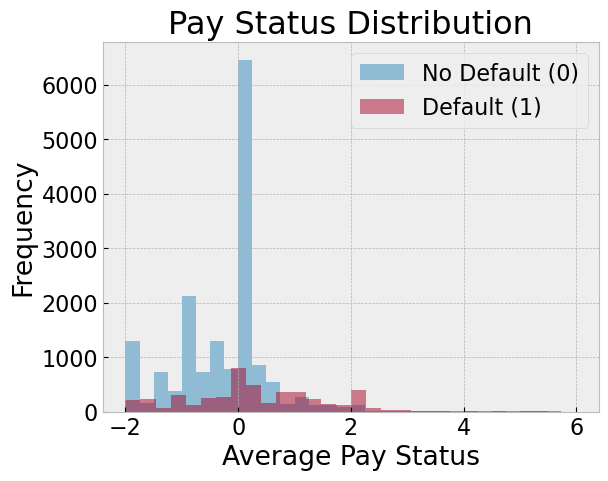

In [13]:
pay_cols = ["PAY_0"] + [f"PAY_{i}" for i in range(2, 7)]
average_pay_status_df = sum(train_df[col] for col in pay_cols) / len(pay_cols)
plt.style.use("bmh")
plt.hist(average_pay_status_df[train_df["default.payment.next.month"] != 1], bins=30, alpha=0.5, label='No Default (0)')
plt.hist(average_pay_status_df[train_df["default.payment.next.month"] == 1], bins=30, alpha=0.5, label='Default (1)')
plt.title("Pay Status Distribution")
plt.xlabel("Average Pay Status")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Based on the plot above, it seems like users who default are more likely to delay their payments longer, so there seems to be some correlation here.
This seems like it might be a pretty useful feature, so I further want to gain an understanding of the data for this

In [14]:
# compute average PAY status per user (row-wise), without modifying train_df
avg_pay_status = train_df[pay_cols].mean(axis=1)

# create masks for default and no-default groups
mask_no_default = train_df['default.payment.next.month'] != 1
mask_default = train_df['default.payment.next.month'] == 1

# compute average PAY stats for each group
avg_stats_no_default = avg_pay_status[mask_no_default]
avg_stats_default = avg_pay_status[mask_default]

summary = pd.DataFrame({
    'Group': ['No Default (0)', 'Default (1)'],
    'Mean Avg PAY Status': [avg_stats_no_default.mean(), avg_stats_default.mean()],
    'Median Avg PAY Status': [avg_stats_no_default.median(), avg_stats_default.median()],
    'Max Avg PAY Status': [avg_stats_no_default.max(), avg_stats_default.max()],
    'Min Avg PAY Status': [avg_stats_no_default.min(), avg_stats_default.min()],
    'Std Dev': [avg_stats_no_default.std(), avg_stats_default.std()]
})

summary

,Group,Mean Avg PAY Status,Median Avg PAY Status,Max Avg PAY Status,Min Avg PAY Status,Std Dev
0,No Default (0),-0.335489,0.000000,5.5,-2.0,0.830112
1,Default (1),0.339448,0.333333,6.0,-2.0,1.248434


The above table shows the summary statistics of the average pay status. The most interesting stats, in my opinion, are the mean (Mean Avg PAY Status), showing that the users who default have a higher average pay status of 0.34, however, this is not that much greater than the same for users who didn't default. The next statistic I want to consider is the max average pay status (Max Avg PAY Status). The highest average pay status value for those who default, at 6.0, is higher than that for those who don't default. However, this again is not too large. 

I still believe that this feature would be valuable in training the model

## Summary
Looking at all the histograms and bar plots for all the features, it seems like most features individually don't have much correlation with the default next month feature. This is not to say that they aren't useful in prediction; they might work better in prediction in combination with the other features. 

## Metric for Model
Since the goal of this model is to reduce the number of defaults by identifying potential users who might default next month, we feel that focusing on reducing the false negatives is important. However, we also feel that reducing false positives is equally important, so using the F1 score is the best metric here.

In [15]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

The Features I think would be most useful to engineer and add for training are the average pay status, and a pay status trend (PAY_0 - PAY_6): shows the direction of user repayment behavior).

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

Now the aim is to create a preprocessor that will prepare the data for training and testing models models. This will be passed into pipelines so it is reusable and simplifies and standardizes the processing of data at each stage. The processing includes creating the new columns discussed above (average pay status, and pay status trend), normalizing the numeric data, and encoding the categorical to be used for training. This preprocessor should also clean up some features.

We noticed that values 5 and 6 in education which correspond to unknown is not very relevant despite having a low count. This can potentially be merged with value 4 which corresponds to others. Additionally, we noticed that there are some stray 0 values; these too will be merged with value 4. 
A similar transformation was applied to marriage with 0.

A note on using sex. We realize this might be a controversial choice in training the model, however, based on the bivariate EDA, there doesn't seem to be a bias in the data collection as the target seems proportionally split for each sex. Additionally we thing having additional, meaningful data may only help with the training of the model.


In [16]:
# define custom methods to use in transformer
def clean_education(X):
    X = X.copy()
    X['EDUCATION'] = X['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
    X['MARRIAGE'] = X['MARRIAGE'].replace({0: 3})
    return X

def add_custom_features(X):
    X = X.copy()
    X['AVG_PAY_STATUS'] = X[pay_cols].mean(axis=1)
    X['PAY_TREND'] = X['PAY_0'] - X['PAY_6']
    return X

In [17]:
custom_cleaning = Pipeline([
    ('clean_education', FunctionTransformer(clean_education, validate=False)),
    ('add_features', FunctionTransformer(add_custom_features, validate=False))
])

numeric_cols = ['LIMIT_BAL', 'AGE', 'AVG_PAY_STATUS', 'PAY_TREND'] + \
               [f'BILL_AMT{i}' for i in range(1, 7)] + \
               [f'PAY_AMT{i}' for i in range(1, 7)]
onehot_cols = ['MARRIAGE']
onehot_bin_cols = ['SEX']
drop_cols = pay_cols + ['ID']

#('ohe_sex', OneHotEncoder(drop='if_binary'), onehot_bin_cols),
# ('drop_pay', 'drop', pay_cols)

column_transformer = ColumnTransformer([
    ('scale_num', StandardScaler(), numeric_cols),
    ('ohe_marriage', OneHotEncoder(), onehot_cols),
    ('ohe_sex', OneHotEncoder(drop='if_binary'), onehot_bin_cols),
    ('drop_pay', 'drop', drop_cols)
], remainder='passthrough')

preprocessor = Pipeline([
    ('custom_cleaning', custom_cleaning),
    ('column_transformer', column_transformer)
])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [18]:
# Define the dummy model and the dummy pipeline
##########################################################
# Drop target variable
dummy_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent', random_state=123))
])

In [19]:
# Run cross-validation using dummy pipeline
##########################################################
X = train_df.drop(columns=['default.payment.next.month'])
y = train_df['default.payment.next.month']

cv_results = cross_validate(
    dummy_pipeline, X, y,
    cv=5,
    scoring={
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0)
    },
    return_train_score=False
)

# Summary
results_df = pd.DataFrame(cv_results)
results_df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.035737,0.016158,0.776905,0.0,0.0,0.0
1,0.018844,0.014098,0.776905,0.0,0.0,0.0
2,0.017322,0.014324,0.776667,0.0,0.0,0.0
3,0.016664,0.013970,0.776667,0.0,0.0,0.0
4,0.016615,0.013998,0.776667,0.0,0.0,0.0


In [20]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

For our first real model trained on the training set, we chose to use a logistic regression. We first try cross-validating for this linear fit with different values of the hyper-parameter C. For each C we will calculate the accuracy, F1 score, and standard deviation in the F1 score to better understand the models performance on validation sets.

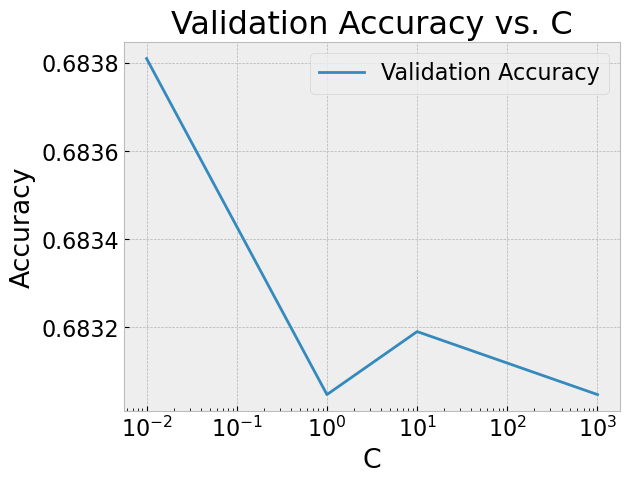

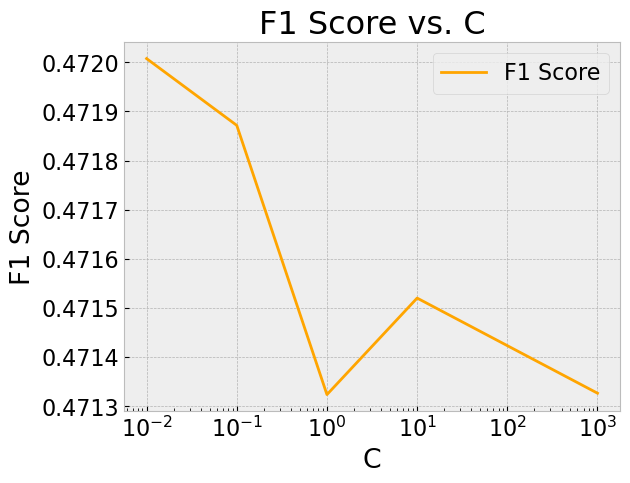

         validation_accuracy  f1_accuracy  validation_sd     f1_sd
0.01                0.683810     0.472008       0.006037  0.002137
0.10                0.683429     0.471872       0.005615  0.002607
1.00                0.683048     0.471323       0.006103  0.002665
10.00               0.683190     0.471520       0.006204  0.002836
1000.00             0.683048     0.471326       0.006284  0.002735


In [21]:
cv_scores = []
f1_scores = []

scores = {}


C = [0.01, 0.1, 1, 10, 1000]

for c in C:


    lr = LogisticRegression(class_weight = 'balanced', max_iter = 10000, random_state = 123, C = c)
    lr_pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', lr)])
    
    cv_results = cross_validate(
        lr_pipe, X, y,
        cv=5,
        scoring={
            'accuracy': 'accuracy',
            'precision': make_scorer(precision_score, zero_division=0),
            'recall': make_scorer(recall_score, zero_division=0),
            'f1': make_scorer(f1_score, zero_division=0)
        },
        return_train_score=False
    )
    cv_scores.append(cv_results["test_accuracy"].mean())
    f1_scores.append(cv_results["test_f1"].mean())
    scores[c] = [cv_results["test_accuracy"].mean(), cv_results["test_f1"].mean(), np.std(cv_results["test_accuracy"]), np.std(cv_results["test_f1"])]

plt.figure()
plt.semilogx(C, cv_scores, label="Validation Accuracy")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy vs. C")
plt.legend()
plt.grid(True)

plt.figure()
plt.semilogx(C, f1_scores, label="F1 Score", color="orange")
plt.xlabel("C")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. C")
plt.legend()
plt.grid(True)

plt.show()

print(pd.DataFrame.from_dict(scores, orient = "index", columns = ["validation_accuracy", "f1_accuracy", "validation_sd", "f1_sd"]))

The Graphs above show the performance of the model (accuracy and F1) for each value of C. Using this, we can see the F1 and accuracy is optimized near C = 0.01. The Table further shows the results. The standard deviations are pretty low, indicating consistent performance. However, it should be noted that the accuracy and F1 scores aren't very high. The Accuracy itself is not higher than the baseline, so this is not a good model and further investigation should be made, or should choose an alternative model.

In [22]:
...

Ellipsis

In [23]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

Logistic regression performed quite poorly, so alternative models should be investigated to see if they perform better. For this section we decided to use KNN, SVM RBF, and random forests.

### KNN

In [24]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

cv_results = cross_validate(
    knn_pipeline, X, y,
    cv=5,
    scoring={
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0)
    },
    return_train_score=True
)

# Summary
results_df = pd.DataFrame(cv_results)
results_df 

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.058354,0.327158,0.791190,0.841667,0.551724,0.730460,0.341515,0.460944,0.421885,0.565217
1,0.034715,0.130060,0.792381,0.843690,0.554806,0.741106,0.351121,0.460944,0.430065,0.568376
2,0.026085,0.112694,0.799286,0.842143,0.586521,0.733220,0.343284,0.460267,0.433087,0.565531
3,0.022996,0.093500,0.796190,0.841667,0.572954,0.735116,0.343284,0.454400,0.429333,0.561635
4,0.023613,0.092567,0.798571,0.840536,0.581272,0.732927,0.350746,0.449333,0.437500,0.557117


### SVM RBF

In [26]:
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel = "rbf"))
])

cv_results = cross_validate(
    svc_pipeline, X, y,
    cv=5,
    scoring={
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0)
    },
    return_train_score=True
)

# Summary
results_df = pd.DataFrame(cv_results)
results_df 

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,7.711383,2.037101,0.805714,0.814226,0.638444,0.685076,0.297759,0.310850,0.406114,0.427655
1,7.391583,2.003416,0.807857,0.814821,0.652582,0.691617,0.296692,0.307918,0.407924,0.426121
2,7.508738,2.023561,0.814524,0.813512,0.695332,0.682436,0.301706,0.307733,0.420818,0.424187
3,7.467238,2.009254,0.810714,0.812738,0.681013,0.689698,0.286780,0.292800,0.403601,0.411082
4,7.510494,2.187709,0.807619,0.813452,0.674731,0.687805,0.267591,0.300800,0.383206,0.418553


### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state = 123, n_jobs = -1))
])

cv_results = cross_validate(
    rf_pipeline, X, y,
    cv=5,
    scoring={
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0)
    },
    return_train_score=True
)

# Summary
results_df = pd.DataFrame(cv_results)
results_df 

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.322987,0.058685,0.808333,0.999405,0.617438,0.999199,0.370331,0.998134,0.462975,0.998666
1,1.206805,0.043685,0.809048,0.999405,0.618214,0.999199,0.376734,0.998134,0.468170,0.998666
2,1.115887,0.043838,0.818333,0.999405,0.667304,0.999466,0.372068,0.997867,0.477755,0.998666
3,1.113485,0.044255,0.814524,0.999167,0.640708,0.998665,0.385928,0.997600,0.481703,0.998132
4,1.432915,0.045546,0.814286,0.999464,0.647940,0.998933,0.368870,0.998667,0.470109,0.998800


#### Discussion
All these alternative models seem to perform better than the baseline in terms of accuracy, which makes it better in prediction. Our goal here is to optimize for the F1 score. Looking at that, random forest seems to perform best in this regard. However, this score is still pretty low. When we optimize hyper-parameters, we will optimize on F1 score. Based on the results here, Random forests seems like it may perform the best.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [45]:
from sklearn.feature_selection import RFECV

# View Training data after processing:
##################################################
X_check = train_df.drop(columns=['default.payment.next.month'])
X_check_processed = preprocessor.fit_transform(X_check)

# Access the fitted ColumnTransformer
ct = preprocessor.named_steps['column_transformer']

# 1. Numeric columns (already defined)
numeric_names = numeric_cols

# 2. One-hot encoded column names
marriage_ohe = ct.named_transformers_['ohe_marriage']
marriage_names = marriage_ohe.get_feature_names_out(['MARRIAGE'])

sex_ohe = ct.named_transformers_['ohe_sex']
sex_names = sex_ohe.get_feature_names_out(['SEX'])

# 3. Identify passthrough columns (those not explicitly processed or dropped)
all_cols = X_check.columns.tolist()
transformed_cols = numeric_cols + onehot_cols + onehot_bin_cols + drop_cols
passthrough_cols = [col for col in all_cols if col not in transformed_cols]

# 4. Combine everything into one final list of names
final_columns = list(numeric_names) + list(marriage_names) + list(sex_names) + passthrough_cols

X_check_processed_df = pd.DataFrame(X_check_processed, columns=final_columns)
X_check_processed_df.head()



,LIMIT_BAL,AGE,AVG_PAY_STATUS,PAY_TREND,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_2,EDUCATION
0,1.168355,0.054187,0.188425,-0.239659,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,...,-0.040229,-0.234603,-0.114944,-0.312050,0.097991,0.0,1.0,0.0,1.0,1.0
1,2.090017,-0.597108,-0.321334,-1.096604,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,...,3.739796,6.785208,-0.113778,0.672988,2.562606,0.0,1.0,0.0,1.0,1.0
2,-0.060527,0.922579,-1.850612,-0.239659,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,...,-0.270403,-0.289017,-0.309323,-0.312050,-0.289117,1.0,0.0,0.0,1.0,3.0
3,-0.367748,-0.597108,0.188425,-0.239659,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,...,-0.018028,-0.060260,-0.113843,-0.180384,-0.195169,1.0,0.0,0.0,1.0,2.0
4,-0.905384,2.008070,0.698184,0.617286,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,...,-0.206185,-0.223720,-0.212134,-0.246381,-0.206319,0.0,1.0,0.0,0.0,2.0


In [46]:
rfe_cv = RFECV(LogisticRegression(class_weight = 'balanced', max_iter = 10000, random_state = 123), cv = 5)
rfe_cv.fit(X_check_processed_df, y)
print(rfe_cv.support_) 

[False False  True  True  True False False False False False False False
 False False False False False False False False False]


In [47]:
print(X_check_processed_df.columns[rfe_cv.support_])

Index(['AVG_PAY_STATUS', 'PAY_TREND', 'BILL_AMT1'], dtype='object')


In [48]:
from sklearn.ensemble import RandomForestClassifier
rfe_pipe = make_pipeline(preprocessor, RFECV(LogisticRegression(max_iter=10000),cv=5), RandomForestClassifier(random_state = 123, n_jobs = -1))
pd.DataFrame(cross_validate(rfe_pipe, X, y,  scoring={
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0)
    }, return_train_score=True)).mean()

fit_time           2.761858
score_time         0.046592
test_accuracy      0.811667
train_accuracy     0.995940
test_precision     0.632116
train_precision    0.994337
test_recall        0.375427
train_recall       0.987416
test_f1            0.470929
train_f1           0.990842
dtype: float64

Our results are around the same for the f1 score metric. We think we should keep more features so we will not do feature selection here.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_grid = {'kneighborsclassifier__n_neighbors': [2, 4, 6, 8, 11, 14, 20]}

knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier())
grid_knn = GridSearchCV(knn_pipe, knn_grid, scoring='f1', cv=5, n_jobs = -1)
grid_knn.fit(X, y)
print(grid_knn.best_params_)
print(grid_knn.best_score_) 

{'kneighborsclassifier__n_neighbors': 11}
0.433239875332062


In [50]:
# from scipy.stats import (loguniform, randint)

# svc_grid = {
#     "svc__gamma": randint(1, 1000),
#     "svc__C": loguniform(1e-2, 1e2),
# }
# svc_pipe = make_pipeline(preprocessor, SVC(kernel = "rbf")) 
# rs = RandomizedSearchCV(svc_pipe, scoring = 'f1', svc_grid, n_jobs=-1, return_train_score=True)
# rs.fit(X, y)
# print(rs.best_score_)
# print(rs.best_params_) 

In [51]:
rf_grid = {
    'randomforestclassifier__n_estimators': np.arange(1, 201),
    'randomforestclassifier__max_depth': np.arange(1, 31)
}

rf_pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=123))
rand_rf = RandomizedSearchCV(rf_pipe, rf_grid, scoring = 'f1', cv=5, n_jobs=-1, n_iter=10, random_state = 123)
rand_rf.fit(X, y)

print(rand_rf.best_score_) 
rand_rf.best_params_

0.4779547186168564


{'randomforestclassifier__n_estimators': np.int64(183),
 'randomforestclassifier__max_depth': np.int64(18)}

In [52]:
...

Ellipsis

In [53]:
...

Ellipsis

In [54]:
...

Ellipsis

In [55]:
...

Ellipsis

In [56]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [57]:
rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=123, n_estimators = 183, max_depth = 18))
rf.fit(X, y)

important_features= {}

rf.named_steps["randomforestclassifier"]
for i in enumerate(rf.named_steps["randomforestclassifier"].feature_importances_):
    important_features[X_check_processed_df.columns[i[0]]] = i[1]
    
important_features_df = pd.DataFrame.from_dict(important_features, orient = "index")
important_features_df.columns = ["feature_imp"]
important_features_df.sort_values(by = "feature_imp", ascending = False)
important_features_df 

,feature_imp
LIMIT_BAL,0.053190
AGE,0.053278
AVG_PAY_STATUS,0.173712
PAY_TREND,0.055155
BILL_AMT1,0.058303
BILL_AMT2,0.056656
BILL_AMT3,0.054031
BILL_AMT4,0.052752
BILL_AMT5,0.052150
BILL_AMT6,0.053175


In [58]:
...

Ellipsis

In [59]:
...

Ellipsis

In [60]:
...

Ellipsis

In [61]:
...

Ellipsis

In [62]:
...

Ellipsis

In [63]:
...

Ellipsis

In [64]:
...

Ellipsis

In [65]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [66]:
X_test = test_df.drop(columns=['default.payment.next.month'])
y_test = test_df['default.payment.next.month']
rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=123, n_estimators = 175, max_depth = 30))
rf.fit(X,y)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      7052
           1       0.61      0.38      0.47      1948

    accuracy                           0.81      9000
   macro avg       0.73      0.66      0.68      9000
weighted avg       0.79      0.81      0.80      9000



In [69]:
import shap
shap.initjs()

In [ ]:


rf_pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=123, n_estimators = 183, max_depth = 18))
model = rf_pipe.named_steps["randomforestclassifier"]
model.fit(X, y)
explainer = shap.TreeExplainer(model)
train_shap_values = explainer(X)
test_shap_values= explainer(X_test)

In [ ]:
train_shap_values.shape

In [ ]:
test_shap_values.shape

In [ ]:
train_shap_values

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

The biggest takeaway is the importance of the data. In order to have a good supervised machine learning model, a majority and crucial step is to clean, wrangle, and engineering so that our features are relevant and useful. This requires a lot of thinking from EDA and other analysis tools to feature select or feature engineer for better results.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)